In [1]:
#installation
#!pip install library_name

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Dhaka Rent.csv', sep=';') #import the

In [4]:
df.head() #

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
df = pd.read_excel('Dhaka Rent.xlsx')

In [6]:
df.head()# 5 rows including all column

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [7]:
df.head(2)

,area,rent
0,2000,31500
1,2100,35000


In [8]:
df.area

0     2000
1     2100
2     2500
3     2250
4     3000
5     1900
6     1500
7     1850
8     2700
9     2100
10    2150
11    2100
12    2100
13    2510
14    2250
15    3100
16    1800
17    1550
18    1800
19    2700
20    2110
21    2100
22    3500
23    1200
24    2800
25    3100
26    2750
27    1800
28    2200
29    3100
30    2100
31    2100
32    2500
33    2250
34    3000
35    1900
36    1500
37    1850
38    2700
39    2100
40    2150
41    2100
42    2100
43    2510
44    2250
45    3100
46    1800
47    1550
48    1800
49    2700
50    2110
51    2100
52    3500
53    1200
54    2800
55    3100
56    2750
57    1800
58    2200
59    3100
Name: area, dtype: int64

In [9]:
#df.rent

In [10]:
df.shape

(60, 2)

In [11]:
row, col=df.shape

In [12]:
row

60

In [13]:
col

2

In [14]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [15]:
df[25:30] #specific num of rows

,area,rent
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460
29,3100,51400


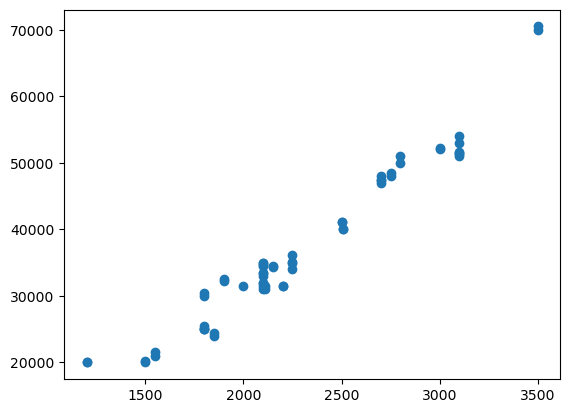

In [16]:
plt.scatter(df.area, df.rent)

Text(0.5, 1.0, 'Dhaka Rent Data')

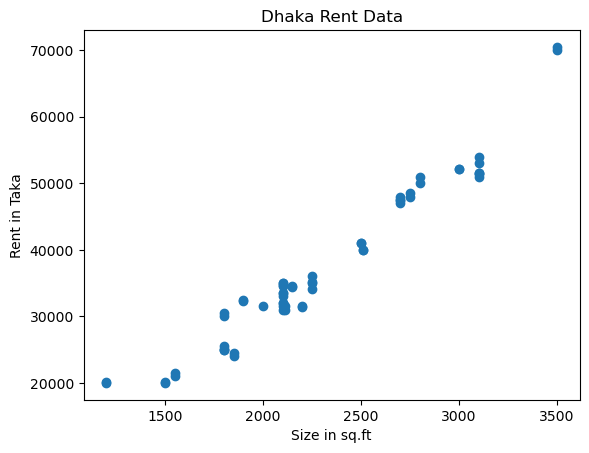

In [17]:
plt.scatter(df[['area']], df[['rent']])
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq.ft')
plt.title('Dhaka Rent Data')

Text(0.5, 1.0, 'Dhaka Rent Data')

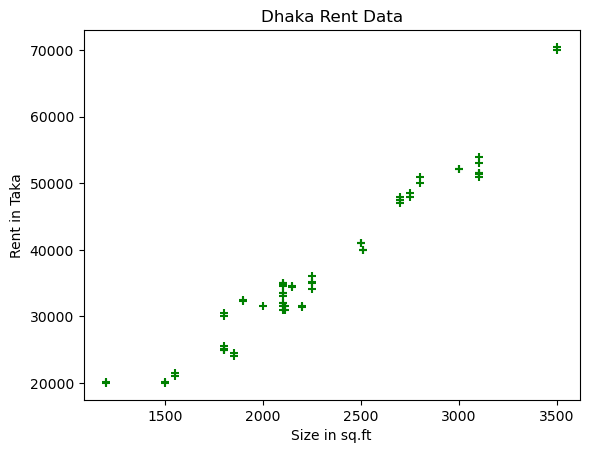

In [18]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html
plt.scatter(df[['area']], df[['rent']], color='green', marker = '+')
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq.ft')
plt.title('Dhaka Rent Data')

In [19]:
df.area.mean()

2289.0

In [20]:
df.rent.mean()

37269.166666666664

In [21]:
x=df[['area']]#2d
y=df[['rent']]

In [22]:
x=df.drop('rent', axis=1)#axis=1 means column, 0 means row

In [23]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [24]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [25]:
#splitting dataset into train and test set
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split as tts

In [26]:
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=0.33,random_state=1)

In [27]:
xtrain.head()

,area
42,2100
56,2750
17,1550
31,2100
49,2700


In [28]:
ytrain.head()

,rent
42,34700
56,48500
17,21000
31,35010
49,47500


In [29]:
xtest.head()

,area
39,2100
41,2100
2,2500
48,1800
50,2110


In [30]:
ytest.head()

,rent
39,31500
41,32020
2,41050
48,25500
50,31000


# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg=LinearRegression()# creating linear regression object

In [33]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [34]:
reg.predict([[2000]])

array([[30927.80436869]])

In [35]:
#df[20:50]

In [36]:
m= reg.coef_

In [37]:
c=reg.intercept_

In [38]:
c

array([-11077.74592515])

In [39]:
m

array([[21.00277515]])

In [40]:
predicted=(m*2000)+c
predicted

array([[30927.80436869]])

In [41]:
reg.predict([[2000]])

array([[30927.80436869]])

In [42]:
reg.predict(xtest)

array([[33028.08188338],
       [33028.08188338],
       [41429.19194215],
       [26727.2493393 ],
       [33238.10963485],
       [36178.49815542],
       [36178.49815542],
       [28827.52685399],
       [34078.22064072],
       [26727.2493393 ],
       [47730.02448622],
       [14125.58425115],
       [26727.2493393 ],
       [36178.49815542],
       [46679.88572888],
       [20426.41679523],
       [33028.08188338],
       [34078.22064072],
       [62431.96708907],
       [45629.74697153]])

In [43]:
df2=df.copy()

In [44]:
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [45]:
df2['predicted']=reg.predict(df[['area']])

In [46]:
df2.head()

,area,rent,predicted
0,2000,31500,30927.804369
1,2100,35000,33028.081883
2,2500,41050,41429.191942
3,2250,36100,36178.498155
4,3000,52100,51930.579516


In [47]:
#df2

In [48]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Best fit Line

Text(0.5, 1.0, 'Dhaka Rent Data')

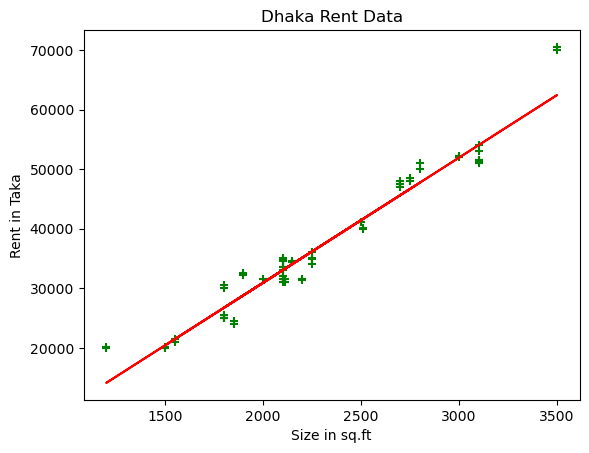

In [49]:
plt.scatter(df[['area']], df[['rent']], color='green', marker = '+')
plt.plot(xtest,reg.predict(xtest), color='red') #reg.predict(xtest)=m*test+c
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq.ft')
plt.title('Dhaka Rent Data')

Text(0.5, 1.0, 'Dhaka Rent Data')

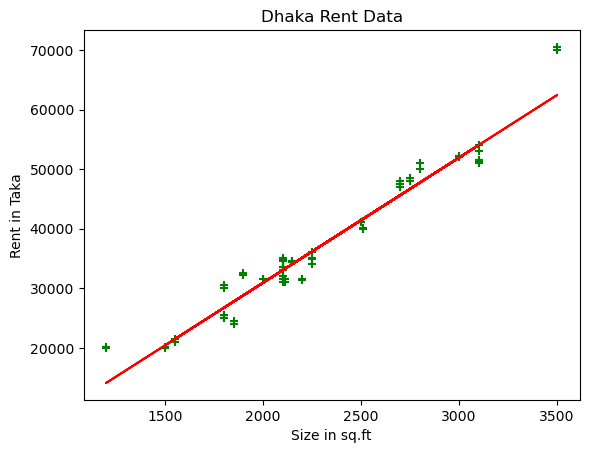

In [50]:
plt.scatter(df[['area']], df[['rent']], color='green', marker = '+')
plt.plot(xtrain,reg.predict(xtrain), color='red')
plt.ylabel('Rent in Taka')
plt.xlabel('Size in sq.ft')
plt.title('Dhaka Rent Data')

In [51]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [52]:
#testing MSE
test_mse= mean_squared_error(ytest,reg.predict(xtest)) #ytest is actual  y, reg.predict(xtest) is actually predicted y
test_mse

7421807.705906522

In [53]:
#testing MAE
test_mse= mean_absolute_error(ytest,reg.predict(xtest))
test_mse

1881.6683699430062

In [54]:
#training MSE
train_mse= mean_squared_error(ytrain,reg.predict(xtrain))
train_mse

6602823.624588491

In [55]:
#training MAE
train_mse= mean_absolute_error(ytrain,reg.predict(xtrain))
train_mse

2034.6296483710926